<B>GRIP 2021</B>

<B>TASK-2(Data Science & Business Analytics Internship)</B>

<B>Made By: KUNAL ANAND</B>


## Performng Clustering on IRIS DATASET and Then Finding The Optimal Number Of Clusters

In [1]:
#importing dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataset
data=pd.read_csv(r'C:\Users\KUNAL\Documents\SparkInternship\Iris (2).csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Showing Different Columns
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
# Counting the no. of null values in the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Five Point Summary of data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# checking the percentage of missing data contains in all the columns
missing_percentage = data.isnull().sum()/100
print(missing_percentage)

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64


## Data Visualization

### Data Correlation

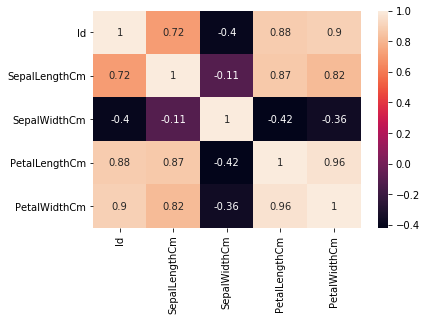

In [8]:
sns.heatmap(data.corr(), annot = True,  cbar_kws= {'orientation': 'vertical'} )

### We come to know from Correlation Matrix 0.96 is the highest value btw PetalWidth and PetalLength

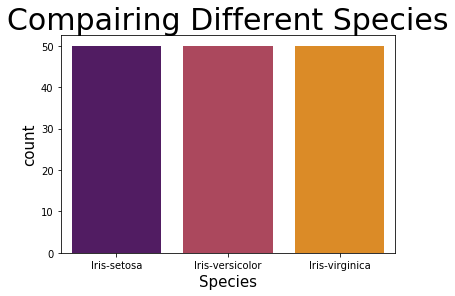

In [13]:
# checking the Distribution of Species 
sns.countplot(data['Species'], palette = 'inferno')
plt.title('Compairing Different Species', fontsize = 30)
plt.xlabel('Species', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

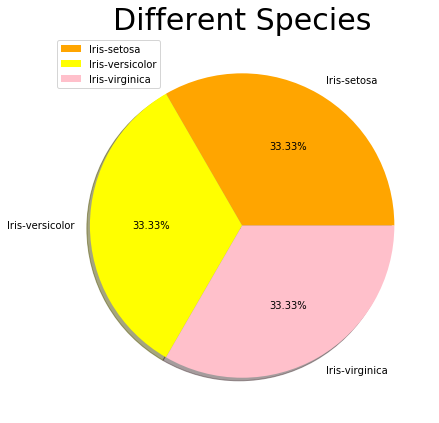

In [27]:
# plotting a pie chart for Species
plt.rcParams['figure.figsize'] = (18, 7)
explode = [0, 0, 0.1]
size = [10000, 10000, 10000]
colors = ['orange', 'yellow', 'pink']
labels = "Iris-setosa", "Iris-versicolor","Iris-virginica"

plt.subplot(1, 1, 1)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Different Species', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

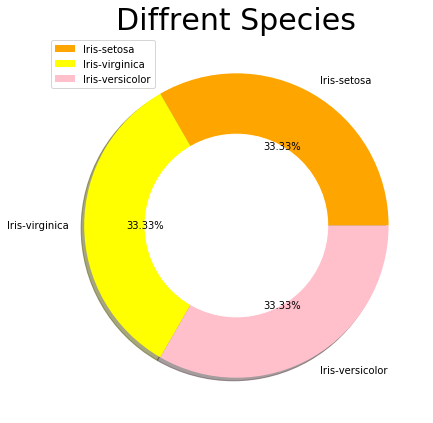

In [30]:
#creating a donut chart for Species

# plotting a pie chart for different number of OSes users have.

size = [10000, 10000,10000]
colors = ['orange', 'yellow', 'pink']
labels = "Iris-setosa", "Iris-virginica","Iris-versicolor"
explode = [0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Diffrent Species', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

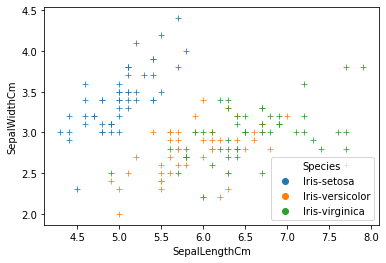

In [11]:
# Scatter plot btw SepalWidth & SepalLength
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=data, marker="+")

## K MEANS CLUSTERING



### Dropping Target column and Id Column: Id,Species



In [7]:
data.drop(['Id'], axis=1, inplace=True)
data.drop(['Species'], axis=1, inplace=True)

In [16]:
# Finding the optimum number of clusters for k-means classification

x = data.iloc[:,:].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [ ]:
#Inertia(intra-distance from the centroid):sum of squared distance btw members of cluster & its centroid
#n_cluster:no. of clusters,random_state:so take same random values and the prediction remain same,
#max_iter:Maximum number of iterations of the k-means algorithm for a single run.
#init:selects initial cluster centers for k-mean clustering in a smart way to speed up convergence
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
# Visualizing the elbow method    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

C:\Users\KUNAL\AnacondaN\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


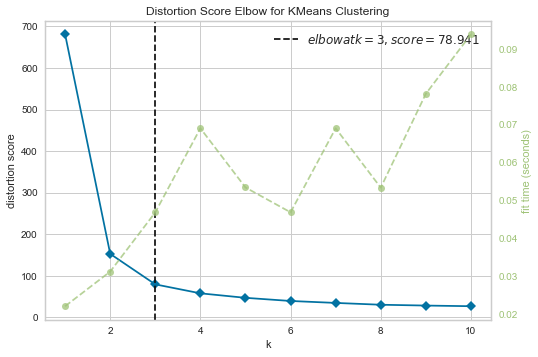

AxesSubplot(0.125,0.125;0.775x0.755)


In [9]:
# Using the elbow method to find the optimal number of clusters.
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

km=KMeans()
visualizer=KElbowVisualizer(km,k=(1,11))
visualizer.fit(x)
print(visualizer.show())

<B>According to this plot, the maximum bend is at third index, that is the number of Optimal no. of Clusters for Adminstrative Duration and Revenue is Three</B>

In [72]:
#Fitting data into K-Means model with 3 clusters
KM_3=KMeans(n_clusters=3,random_state=42)
KM_3.fit_predict(data)
print(KM_3.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [73]:
print(KM_3.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [74]:
pd.Series(KM_3.labels_).value_counts()

0    62
1    50
2    38
dtype: int64

In [75]:
KM_3.inertia_

78.94084142614602

In [76]:
# Fitting  & predicting K-Means to the dataset for K=2
KM_2 = KMeans(n_clusters = 2, init = 'k-means++', max_iter=300, n_init=10,random_state=42)
KM_2.fit_predict(x)
print(KM_2.cluster_centers_)

[[5.00566038 3.36037736 1.56226415 0.28867925]
 [6.30103093 2.88659794 4.95876289 1.69587629]]


In [77]:
print(KM_2.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [78]:
pd.Series(KM_2.labels_).value_counts()

1    97
0    53
dtype: int64

In [80]:
KM_2.inertia_

152.36870647733906

### Inertia(intra- Cluster distance of points from the centroid):sum of squared distance btw members of cluster & its centroid

So,Therefore we must have less Inertia and wcss Value to Obtain optimal Cluster's and since k=3 has a less inertia value than k=2 so we take K=3 as an optimal cluster value


## Performance Measure-Silhoutte Coefficient

The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

Silhoutte Formula:b(mean nearest cluster distance)-a(mean intra cluster distance)/max(a(i),b(i))

How close the data point is to other points in the cluster How far away the data point is from points in other clusters Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.


In [15]:
# Fitting the 
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter=100, n_init=10)
    kmeans.fit(x)
    score = silhouette_score(x, kmeans.labels_)
    silhouette_coefficients.append(score)

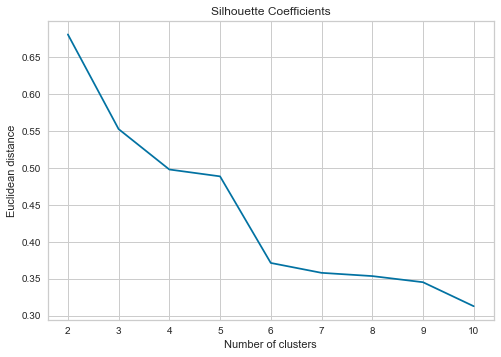

In [16]:
# Visualization of Silhouette Coefficients
plt.plot(range(2, 11), silhouette_coefficients)
plt.title('Silhouette Coefficients')
plt.xlabel('Number of clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [31]:
# Fitting  & predicting K-Means to the dataset for K=3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(x)
score = silhouette_score(x,kmeans.labels_)
score

0.5525919445499757

In [51]:
# Fitting  & predicting K-Means to the dataset for K=3
Kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = Kmeans.fit_predict(x)
kmeans_silhouette_score = silhouette_score(x, kmeans.labels_)
kmeans_silhouette_score 

<B>As observed with k=6 the silhouette score reduces hence we can claim that k=3 gives optimal clusters.</B>


For n_clusters = 3 The average silhouette_score is : 0.5525919445499757
For n_clusters = 4 The average silhouette_score is : 0.4978256901095472
For n_clusters = 5 The average silhouette_score is : 0.4885175508886279
For n_clusters = 6 The average silhouette_score is : 0.3665040150235965


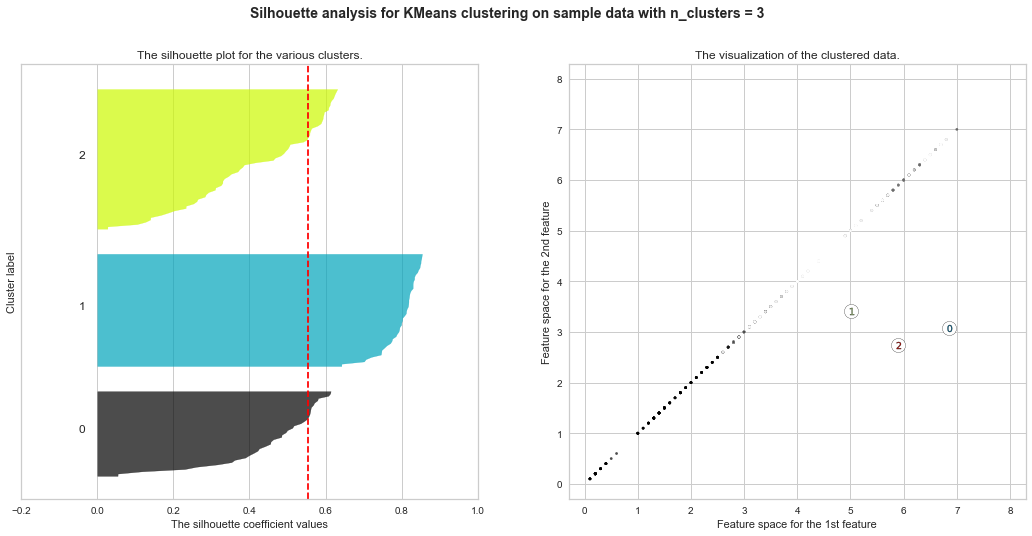

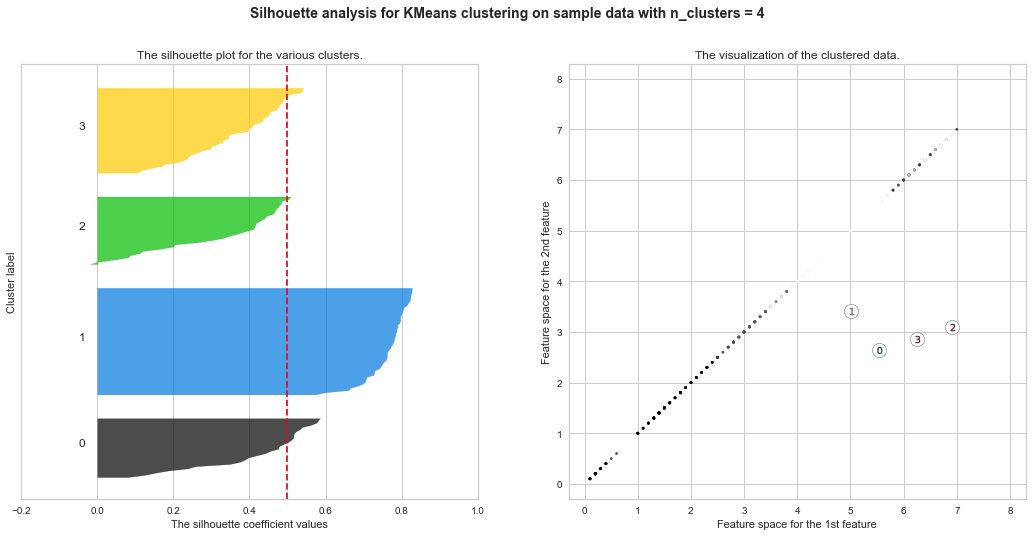

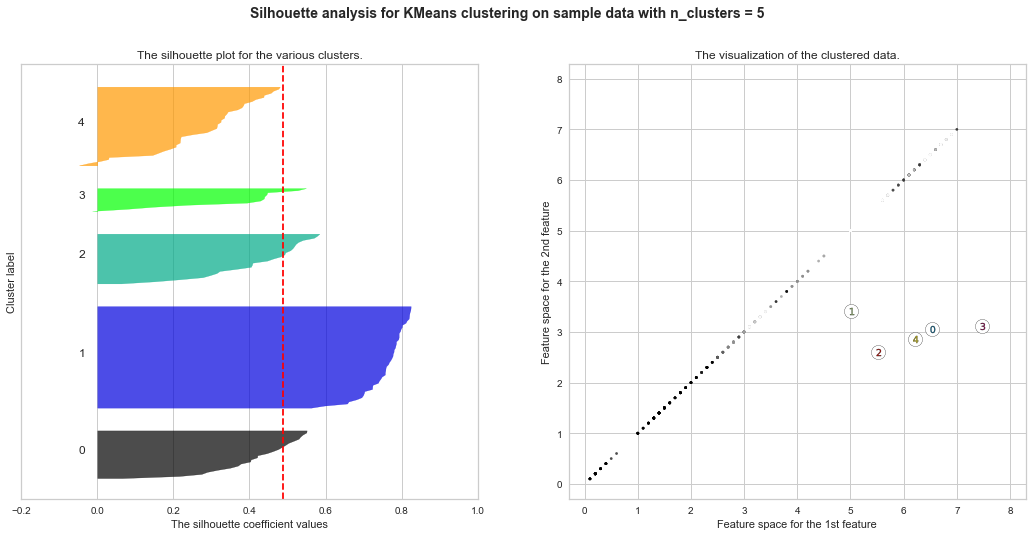

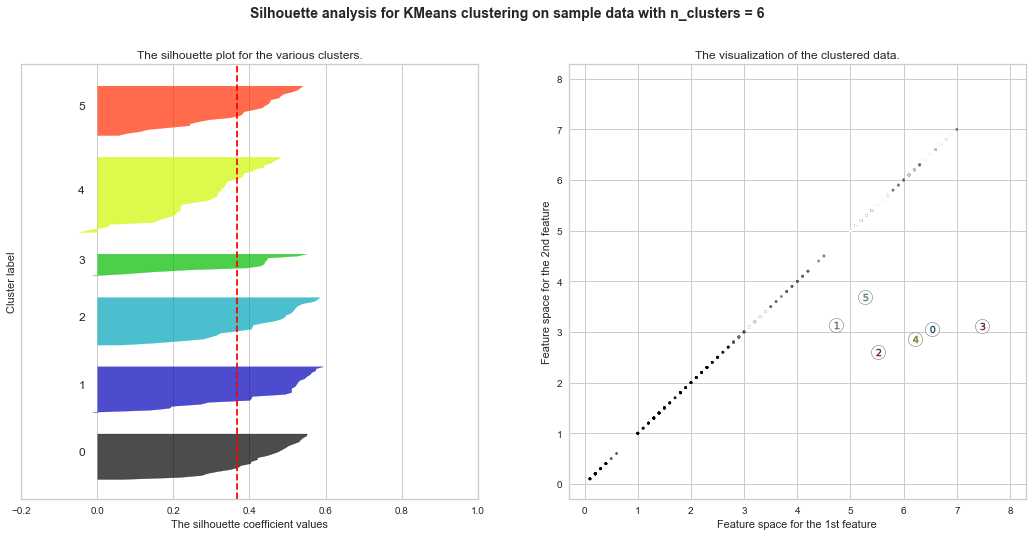

In [86]:
#Silhouette Plots for Different No. of Clustersimport matplotlib.cm as cm
import numpy as np
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples
for n_clusters in range(3,7):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 8)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but here the range is from -0.2 till 1
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator seed of 12345 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=12345)
    cluster_labels = clusterer.fit_predict(data)
    # The silhouette_score gives the average value for all the samples
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data, data, marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

plt.show()

In [19]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(x)

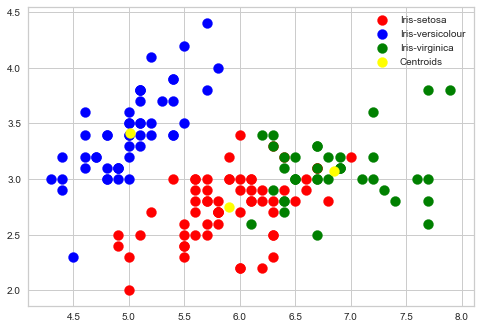

In [20]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()






## From this we choose the number of clusters as 3.
